##:Question de cours


#Q1) définition et un cas d’utilisation dans un type de probléme de
ces fonctions d’activations suivantes:

• Sigmoid 

• ReLu


• Softmax

#Relu
Relu est une fonction d'activation utilisée durant l'apprentissage.
Il nous permet de filtrer:il donne le vecteur d'entrée ou zero( si la valeur du vecteur est négative).Il ne nous permet pas d'avoir les probabilités.
#Sigmoid 
fonction Sigmoide ou fonction logistique  est une fonction d'activation qui permet de convertir la sorti en une probabilité. Elle est généralement utilisée comme activateur de la derniere couche pour les problémes de classification binaire
#Softmax
Softmax est utilisée au niveau de lacouche de sortie.Son role est de transformer un classe de vecteur en classe de probabilité

#Q2) Quelles sont les types d’opérations mathématiques que l’on retrouve dans un neurone artificiel singulier ?
On peut y retrouver:

Les equation linéares

Calcul des probabilités

Calcul de la Vraisemblance

Algorithme de la descente du gradien

Calcul vectoriel

Calcul matriciel
 


#Q3) Comment appelle-t-on l’algorithme d’apprentissage permettant de faire la mise `a jour des poids des neurones.
 L'algorithme d'apprentissage est le Back Propagation

#Q4) Pourquoi les ConvNets sont meilleurs en performances en terme de traitement d’images que les DNN ?
Parceque ils sont caractérisés par deux importantes propriétés:

--Les motifs qu'ils apprennent sont invariants c'est à dire les convenets sont capables de reconnaitre le motif n'importe où durant l'apprentissage

-- Ils peuvent apprendre des hiérarchies spatiales de motif


#Q5) Si aucune de ces expressions n’est correct donner la bonne expression permettant de faire la mise à jour des poids.
La bonne reponse est:

$$ \dfrac{dL}{dSi}
=\frac{1}{m} \sum_{i=1}^{m}\, ({a(^i)-y(^i)}){Si} $$ 


#Q6)Définition math´ematique de la fonction sigmoide
$$ a (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^-z }  $$ 


##2 Projet
On utilisant le jeu de donn´ees X-ray pour la d´etection de la pneumonie, impl´ementer
l’architecture DenseNet201 en utilisant la m´ethode de votre choix : une
m´ethode directe ou en utilisant du transfert learning

In [ ]:
!pip install tensorflow


     |████████████████████████████████| 462 kB 9.0 MB/s 


In [ ]:
import os

## import essential packages

import os 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import callbacks
from keras.applications.vgg16 import VGG16
from keras import backend as K
import seaborn as sns


K.set_learning_phase(1)


/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
%pwd

'/content'

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/"

In [ ]:
%%time
import zipfile
with zipfile.ZipFile(path + "chest_xray.zip","r") as zip_ref:
        zip_ref.extractall("")

CPU times: user 9.52 s, sys: 2.47 s, total: 12 s
Wall time: 12.8 s


In [ ]:
%pwd

'/content'

In [ ]:
path_files = "/content/chest_xray/"

In [ ]:
train_data_dir = path_files + 'train'
validation_data_dir = path_files + 'test'

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
image_size = 150

In [ ]:
import cv2 as cv

In [ ]:
## Une fonction pour faciliter l'affichage des images

def data_loader(data_dir):
    
    """ this is a helper funtion to load image and resize it"""
    
    data = list()
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
                resized_arr = cv.resize(img_arr, (image_size, image_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
                
    return np.array(data)

In [ ]:
%%time
train = data_loader(path_files + 'train')
test = data_loader(path_files + 'test')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

CPU times: user 45.3 s, sys: 969 ms, total: 46.3 s
Wall time: 46.1 s


Text(0.5, 1.0, 'PNEUMONIA')

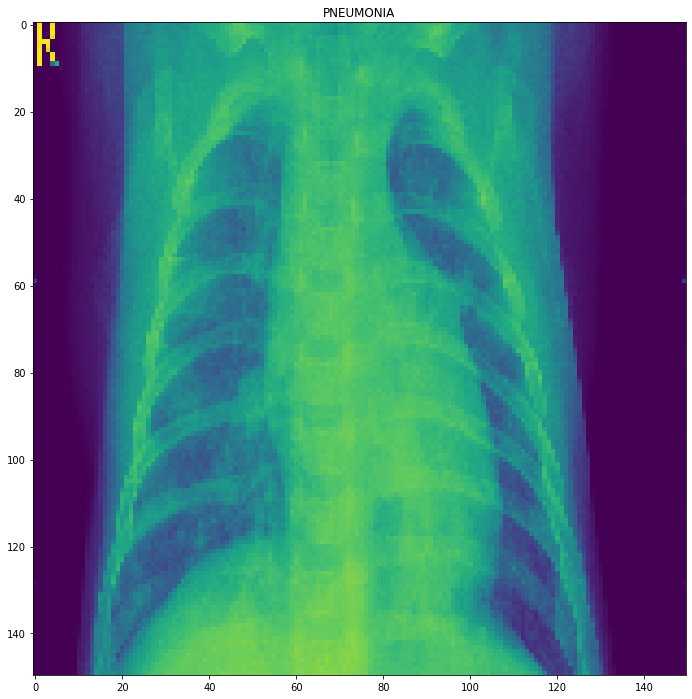

In [ ]:
plt.figure(figsize=(12, 12))
plt.imshow(train[2][0])
plt.title(labels[train[2][1]])

In [ ]:
print("le nombre d'image dans train", len(train))

le nombre d'image dans train 5232


In [ ]:
print("le nombre d'image dans train", len(test))

le nombre d'image dans train 624


## **Modèle**

In [ ]:
epochs = 10
batch_size = 64
seed=42

In [ ]:
img_height, img_width = 224,224

In [ ]:
path_files

'/content/chest_xray/'

In [ ]:
import glob

#chemin d'acces de mes données
train_path=os.path.join(path_files,'train')
test_path=os.path.join(path_files,'test')

#separation des donnée train
train_normal=glob.glob(train_path+'/NORMAL/*.jpeg')
train_pneumonia=glob.glob(train_path+'/PNEUMONIA/*.jpeg')
#separation des donnée test
test_normal=glob.glob(test_path+'/NORMAL/*.jpeg')
test_pneumonia=glob.glob(test_path+'/PNEUMONIA/*.jpeg')

In [ ]:
train_list=[x for x in train_normal]
train_list.extend([x for x in train_pneumonia])
df_train=pd.DataFrame(np.concatenate([[("Normal")]*len(train_normal),['Pneumonia']*len(train_pneumonia)]),columns=['class'])
df_train['image']=[x for x in train_list]



test_list=[x for x in test_normal]
test_list.extend([x for x in test_pneumonia])
df_test=pd.DataFrame(np.concatenate([['Normal']*len(test_normal),['Pneumonia']*len(test_pneumonia)]),columns=['class'])
df_test['image']=[x for x in test_list]

In [ ]:
df_train

,class,image
0,Normal,/content/chest_xray/train/NORMAL/NORMAL-892168...
1,Normal,/content/chest_xray/train/NORMAL/NORMAL-418469...
2,Normal,/content/chest_xray/train/NORMAL/NORMAL-574099...
3,Normal,/content/chest_xray/train/NORMAL/NORMAL-432028...
4,Normal,/content/chest_xray/train/NORMAL/NORMAL-334276...
...,...,...
5227,Pneumonia,/content/chest_xray/train/PNEUMONIA/VIRUS-9801...
5228,Pneumonia,/content/chest_xray/train/PNEUMONIA/BACTERIA-1...
5229,Pneumonia,/content/chest_xray/train/PNEUMONIA/VIRUS-3590...
5230,Pneumonia,/content/chest_xray/train/PNEUMONIA/VIRUS-9403...


In [ ]:
df_test

,class,image
0,Normal,/content/chest_xray/test/NORMAL/NORMAL-706052-...
1,Normal,/content/chest_xray/test/NORMAL/NORMAL-5472638...
2,Normal,/content/chest_xray/test/NORMAL/NORMAL-11419-0...
3,Normal,/content/chest_xray/test/NORMAL/NORMAL-6983998...
4,Normal,/content/chest_xray/test/NORMAL/NORMAL-115218-...
...,...,...
619,Pneumonia,/content/chest_xray/test/PNEUMONIA/VIRUS-38285...
620,Pneumonia,/content/chest_xray/test/PNEUMONIA/BACTERIA-30...
621,Pneumonia,/content/chest_xray/test/PNEUMONIA/BACTERIA-52...
622,Pneumonia,/content/chest_xray/test/PNEUMONIA/BACTERIA-88...


train set NORMAL


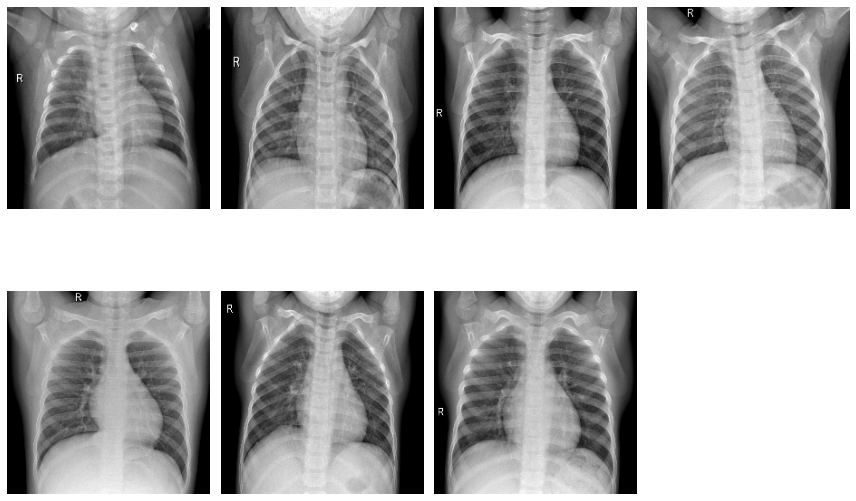

In [ ]:
print('train set NORMAL')
img_size=224
plt.figure(figsize=(12,12))
for i in range(0,7):
  plt.subplot(3,4,i+1)
  img=cv.imread(train_normal[i])
  img=cv.resize(img,(img_size,img_size))
  plt.imshow(img)
  plt.axis('off')

plt.tight_layout()
plt.show()

train set PNEUMONIA


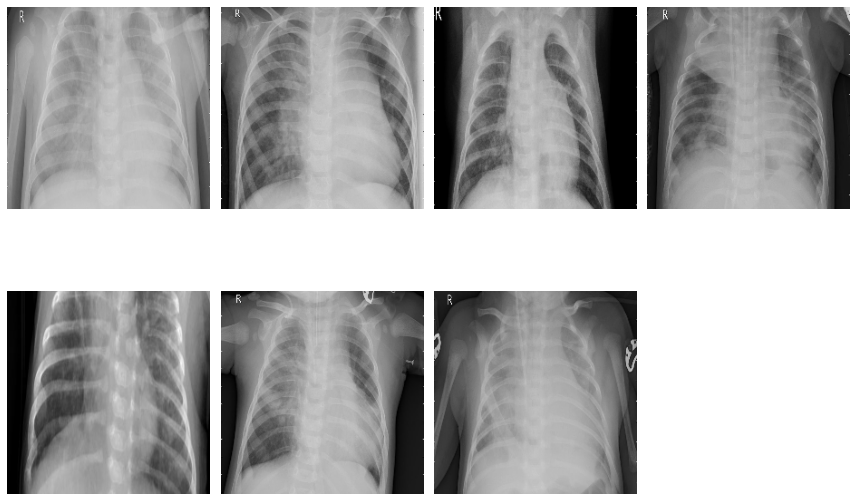

In [ ]:
print('train set PNEUMONIA')
img_size=224
plt.figure(figsize=(12,12))
for i in range(0,7):
  plt.subplot(3,4,i+1)
  img=cv.imread(train_pneumonia[i])
  img=cv.resize(img,(img_size,img_size))
  plt.imshow(img)
  plt.axis('off')

plt.tight_layout()
plt.show()

test set NORMAL


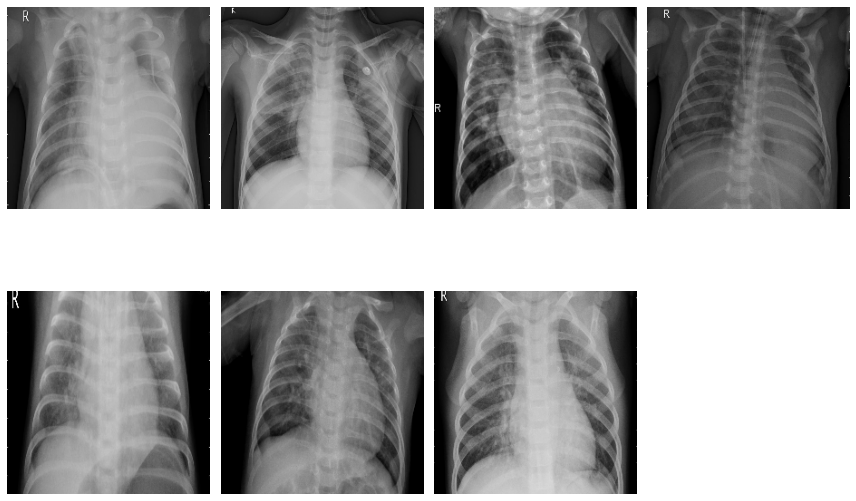

In [ ]:
print('test set NORMAL')
img_size=224
plt.figure(figsize=(12,12))
for i in range(0,7):
  plt.subplot(3,4,i+1)
  img=cv.imread(test_pneumonia[i])
  img=cv.resize(img,(img_size,img_size))
  plt.imshow(img)
  plt.axis('off')

plt.tight_layout()
plt.show()

test set PNEUMONIA


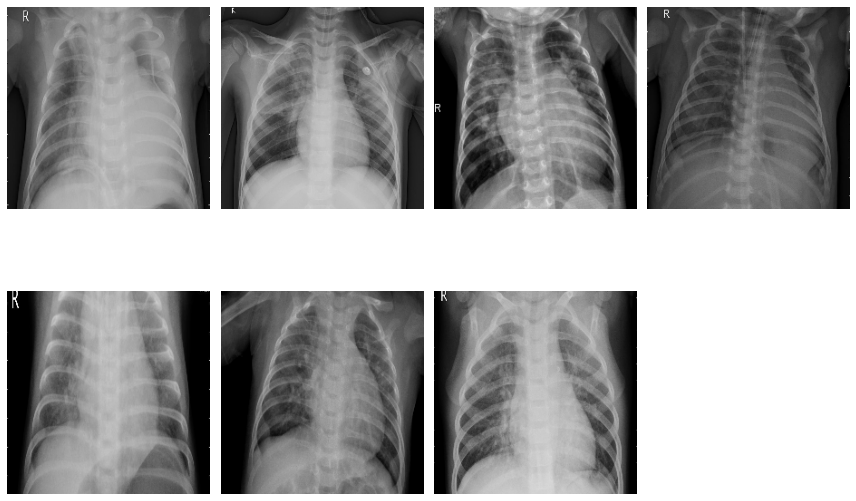

In [ ]:
print('test set PNEUMONIA')
img_size=224
plt.figure(figsize=(12,12))
for i in range(0,7):
  plt.subplot(3,4,i+1)
  img=cv.imread(test_pneumonia[i])
  img=cv.resize(img,(img_size,img_size))
  plt.imshow(img)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_df,valid_df=train_test_split(df_train,test_size=0.11,random_state=seed,stratify=df_train['class'])
print(train_df.shape)
print(valid_df.shape)

(4656, 2)
(576, 2)


In [ ]:
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                        rescale=1. / 255,
                        width_shift_range=0.1,
                        zoom_range=0.1,
                        height_shift_range=0.1)

val_datagen = ImageDataGenerator(rescale=1. / 255)

ds_train = train_datagen.flow_from_dataframe(
                              train_df,
                              x_col='image',
                              y_col='class',
                              target_size=(img_height, img_width),
                              batch_size=batch_size,
                              class_mode='binary')

ds_val = train_datagen.flow_from_dataframe(
                              valid_df,
                              x_col='image',
                              y_col='class',
                              target_size=(img_height, img_width),
                              batch_size=batch_size,
                              class_mode='binary')

ds_test = train_datagen.flow_from_dataframe(
                              df_test,
                              x_col='image',
                              y_col='class',
                              target_size=(img_height, img_width),
                              batch_size=1,
                              class_mode='binary',
                              shuffle=False)

Found 4656 validated image filenames belonging to 2 classes.
Found 576 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten,AveragePooling2D
#premier couche de convolution avec un dropout de 20 %
model = keras.models.Sequential()
model.add(Conv2D(filters=16, kernel_size= (7,7), strides=2, activation='relu', padding='same', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides=2, padding='valid'))


model.add(Conv2D(filters=32, kernel_size=(3,3), strides=2, activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2), strides=2 , padding='valid'))
 

#deuxiement 
model.add(Conv2D(filters=48, kernel_size=(3,3), strides=2, activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2), strides=2, padding='valid'))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=2, activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2,2), strides=2 , padding='same'))
# DNN 
model.add(Flatten())
model.add(Dense(128, activation='relu')) # max(x,0)
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu')) # max(x,0)
# couche sortie 
model.add(Dense(1, activation='sigmoid'))



model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 112, 112, 16)      2368      
                                                                 
 batch_normalization_28 (Bat  (None, 112, 112, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 27, 27, 32)        4640      
                                                                 
 batch_normalization_29 (Bat  (None, 27, 27, 32)       128       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
              metrics=['binary_accuracy']
              )

In [ ]:
%time
batch_size=128
epochs=20
model_history=model.fit(
    ds_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=ds_val
    )

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Epoch 1/20
73/73 [==============================] - 95s 1s/step - loss: 0.5466 - binary_accuracy: 0.7328 - val_loss: 0.6443 - val_binary_accuracy: 0.7413
Epoch 2/20
73/73 [==============================] - 92s 1s/step - loss: 0.3940 - binary_accuracy: 0.8007 - val_loss: 0.5685 - val_binary_accuracy: 0.7413
Epoch 3/20
73/73 [==============================] - 95s 1s/step - loss: 0.2760 - binary_accuracy: 0.9010 - val_loss: 0.6271 - val_binary_accuracy: 0.7413
Epoch 4/20
73/73 [==============================] - 91s 1s/step - loss: 0.2222 - binary_accuracy: 0.9134 - val_loss: 0.8002 - val_binary_accuracy: 0.7413
Epoch 5/20
73/73 [==============================] - 91s 1s/step - loss: 0.1949 - binary_accuracy: 0.9278 - val_loss: 0.9418 - val_binary_accuracy: 0.7413
Epoch 6/20
73/73 [==============================] - 91s 1s/step - loss: 0.1785 - binary_accuracy: 0.9306 - val_loss: 1.0588 - val_binary_accuracy: 0.7413
Epoch 7/20
7

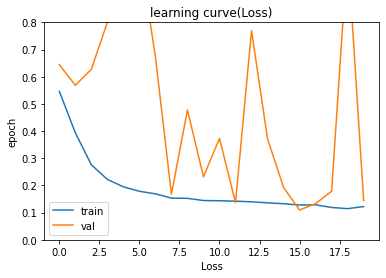

In [ ]:
from sklearn import model_selection
fig,ax=plt.subplots(figsize=(6,4))
sns.lineplot(x=model_history.epoch, y=model_history.history['loss'])
sns.lineplot(x=model_history.epoch, y=model_history.history['val_loss'])
ax.set_title('learning curve(Loss)')
ax.set_xlabel('Loss')
ax.set_ylabel('epoch')
ax.set_ylim(0,0.8)
ax.legend(['train','val'],loc='best')
plt.show()

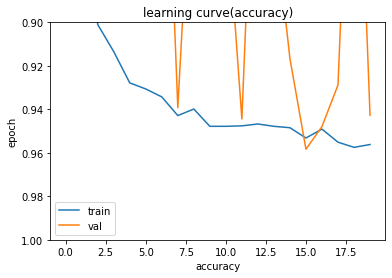

In [ ]:
from sklearn import model_selection
fig,ax=plt.subplots(figsize=(6,4))
sns.lineplot(x=model_history.epoch, y=model_history.history['binary_accuracy'])
sns.lineplot(x=model_history.epoch, y=model_history.history['val_binary_accuracy'])
ax.set_title('learning curve(accuracy)')
ax.set_xlabel('accuracy')
ax.set_ylabel('epoch')
ax.set_ylim(1,0.9)
ax.legend(['train','val'],loc='best')
plt.show()

In [ ]:
score2=model.evaluate(ds_val, steps=len(valid_df)/batch_size,verbose=0)
print('val_Loss:', score2[0])
print('val_accuracy:', score2[1])

val_Loss: 0.14924833178520203
val_accuracy: 0.9437500238418579


In [ ]:
from pandas.core.common import random_state
score2=model.evaluate(ds_test, steps=len(df_test)/batch_size,verbose=0)
print('test_loss:', score2[0])
print('test_accuracy:', score2[1])

test_loss: 0.3383693993091583
test_accuracy: 0.800000011920929
